In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
df = pd.read_pickle("input/data_propre.pkl")

In [4]:
pd.options.display.max_columns = None
df.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,LocationID,BankName,BankFDICNumber,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFY,FirstDisbursementDate,ProcessingMethod,Subprogram,TerminMonths,NAICSCode,NAICSDescription,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,RevolverStatus,JobsSupported,CollateralInd
1,7A,COTTMAN TRANSMISSION,4210 RED BLUFF RD,PASADENA,TX,77503,262382.0,Loans from Old Closed Lenders,NaN,409 3rd Street S.W.,Washington,DC,20416,460400.0,345300.0,10/01/1999,2000,10/31/1999,Preferred Lenders Program,Guaranty,217,811113.0,Automotive Transmission Repair,HARRIS,TX,HOUSTON DISTRICT OFFICE,29.0,CORPORATION,1,0,12.0,Y
2,7A,GOSSELIN & SON TRUCKING INC,660 OLD FALL RIVER RD,NORTH DARTMOUTH,MA,2747,9551.0,"Bank of America, National Association",3510.0,100 North Tryon Street,Charlotte,NC,28255,36000.0,18000.0,10/01/1999,2000,10/31/1999,SBA Express Program,FA$TRK (Small Loan Express),36,NaN,NaN,BRISTOL,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,0,0,2.0,NaN
3,7A,Vande Hey Company Inc.,N2093 COUNTY ROAD N,APPLETON,WI,54915,75939.0,"Associated Bank, National Association",5296.0,200 N Adams St,GREEN BAY,WI,54301,100000.0,80000.0,10/01/1999,2000,11/30/1999,7a General,Guaranty,120,NaN,NaN,OUTAGAMIE,WI,WISCONSIN DISTRICT OFFICE,6.0,CORPORATION,0,0,0.0,N
4,7A,NORTHSTAR ANIMAL CLINIC PC,2004 BLACKBURN RD.,SACHSE,TX,75048,71616.0,LegacyTexas Bank,18843.0,PO Box 869111,Plano,TX,75024,151000.0,113250.0,10/01/1999,2000,12/31/1999,Preferred Lenders Program,Guaranty,84,235410.0,Masonry and Stone Contractors,DALLAS,TX,DALLAS / FT WORTH DISTRICT OFFICE,3.0,CORPORATION,0,0,3.0,NaN
5,7A,HOLLY INN PARTNERSHIP,153 AMPEY RD.,PAW PAW,MI,49079,58036.0,Fifth Third Bank,6672.0,38 Fountain Sq Plz,CINCINNATI,OH,45263,653000.0,489750.0,10/01/1999,2000,10/31/2000,Preferred Lenders Program,Guaranty,180,551112.0,Offices of Other Holding Companies,VAN BUREN,MI,MICHIGAN DISTRICT OFFICE,6.0,PARTNERSHIP,0,0,23.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078960 entries, 1 to 331032
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Program                1078960 non-null  object 
 1   BorrName               1078941 non-null  object 
 2   BorrStreet             1078950 non-null  object 
 3   BorrCity               1078960 non-null  object 
 4   BorrState              1078960 non-null  object 
 5   BorrZip                1078960 non-null  int64  
 6   LocationID             1078289 non-null  float64
 7   BankName               1078960 non-null  object 
 8   BankFDICNumber         987514 non-null   float64
 9   BankStreet             1078288 non-null  object 
 10  BankCity               1078289 non-null  object 
 11  BankState              1078286 non-null  object 
 12  BankZip                1078289 non-null  object 
 13  GrossApproval          1078960 non-null  float64
 14  SBAGuaranteedApproval  1

In [6]:
df

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,LocationID,BankName,BankFDICNumber,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFY,FirstDisbursementDate,ProcessingMethod,Subprogram,TerminMonths,NAICSCode,NAICSDescription,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,RevolverStatus,JobsSupported,CollateralInd
1,7A,COTTMAN TRANSMISSION,4210 RED BLUFF RD,PASADENA,TX,77503,262382.0,Loans from Old Closed Lenders,NaN,409 3rd Street S.W.,Washington,DC,20416,460400.0,345300.0,10/01/1999,2000,10/31/1999,Preferred Lenders Program,Guaranty,217,811113.0,Automotive Transmission Repair,HARRIS,TX,HOUSTON DISTRICT OFFICE,29.0,CORPORATION,1,0,12.0,Y
2,7A,GOSSELIN & SON TRUCKING INC,660 OLD FALL RIVER RD,NORTH DARTMOUTH,MA,2747,9551.0,"Bank of America, National Association",3510.0,100 North Tryon Street,Charlotte,NC,28255,36000.0,18000.0,10/01/1999,2000,10/31/1999,SBA Express Program,FA$TRK (Small Loan Express),36,NaN,NaN,BRISTOL,MA,MASSACHUSETTS DISTRICT OFFICE,9.0,CORPORATION,0,0,2.0,NaN
3,7A,Vande Hey Company Inc.,N2093 COUNTY ROAD N,APPLETON,WI,54915,75939.0,"Associated Bank, National Association",5296.0,200 N Adams St,GREEN BAY,WI,54301,100000.0,80000.0,10/01/1999,2000,11/30/1999,7a General,Guaranty,120,NaN,NaN,OUTAGAMIE,WI,WISCONSIN DISTRICT OFFICE,6.0,CORPORATION,0,0,0.0,N
4,7A,NORTHSTAR ANIMAL CLINIC PC,2004 BLACKBURN RD.,SACHSE,TX,75048,71616.0,LegacyTexas Bank,18843.0,PO Box 869111,Plano,TX,75024,151000.0,113250.0,10/01/1999,2000,12/31/1999,Preferred Lenders Program,Guaranty,84,235410.0,Masonry and Stone Contractors,DALLAS,TX,DALLAS / FT WORTH DISTRICT OFFICE,3.0,CORPORATION,0,0,3.0,NaN
5,7A,HOLLY INN PARTNERSHIP,153 AMPEY RD.,PAW PAW,MI,49079,58036.0,Fifth Third Bank,6672.0,38 Fountain Sq Plz,CINCINNATI,OH,45263,653000.0,489750.0,10/01/1999,2000,10/31/2000,Preferred Lenders Program,Guaranty,180,551112.0,Offices of Other Holding Companies,VAN BUREN,MI,MICHIGAN DISTRICT OFFICE,6.0,PARTNERSHIP,0,0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327562,7A,Dulce Monarca LLC,302 EAST BALTIMORE PIKE,WEST GROVE,PA,19390,46391.0,Manufacturers and Traders Trust Company,588.0,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203.0,25000.0,12500.0,06/06/2025,2025,06/16/2025,SBA Express Program,FA$TRK (Small Loan Express),60,722515.0,Snack and Nonalcoholic Beverage Bars,CHESTER,PA,PHILADELPHIA DISTRICT OFFICE,6.0,CORPORATION,0,0,0.0,N
329221,7A,Sen Zen Massage LLC,99115 Aiea Heights Dr. Ste #22,Aiea,HI,96701,20088.0,First Hawaiian Bank,17985.0,999 Bishop St,HONOLULU,HI,96813.0,75000.0,63750.0,06/20/2025,2025,07/30/2025,Preferred Lenders Program,Guaranty,60,812199.0,Other Personal Care Services,HONOLULU,HI,HAWAII DISTRICT OFFICE,1.0,CORPORATION,0,0,10.0,Y
329245,7A,Sen Zen Massage LLC,99115 AIEA HEIGHTS DR,AIEA,HI,96701,20088.0,First Hawaiian Bank,17985.0,999 Bishop St,HONOLULU,HI,96813.0,75000.0,37500.0,06/20/2025,2025,07/16/2025,Preferred Lenders Program,Guaranty,12,812199.0,Other Personal Care Services,HONOLULU,HI,HAWAII DISTRICT OFFICE,1.0,CORPORATION,0,0,10.0,Y
330525,7A,TODD MEKLES M.D. P.C.,353 LEXINGTON AVE #800,NEW YORK,NY,10016,48270.0,"JPMorgan Chase Bank, National Association",628.0,1111 Polaris Pkwy,Columbus,OH,43240.0,150000.0,75000.0,06/30/2025,2025,07/03/2025,SBA Express Program,FA$TRK (Small Loan Express),120,621330.0,Offices of Mental Health Practitioners (except...,NEW YORK,NY,NEW YORK DISTRICT OFFICE,12.0,CORPORATION,0,1,0.0,Y


In [7]:
df["ApprovalDate"]= pd.to_datetime(df["ApprovalDate"], errors='coerce')
df = df.set_index("ApprovalDate")

In [8]:
df.index.min()

Timestamp('1999-10-01 00:00:00')

In [9]:
df.index.max()

Timestamp('2025-07-02 00:00:00')

In [72]:
# ON a des données d'octobre 1999 à Juillet 2025

# On a des variables qui semblent inutiles comme les adresses exactes (dans tout les cas le modèle pourra pas apprendre les patternes à cause de la granularité)
# La colonne programme ne sert à rien aussi sachant que la ca concerne toujours le meme programme
# Pareil pour les villes et regions sachant qu'on a des codes postaux
# Concernant la banque on va pas garder la banque aussi sachant qu'on a des identifiants deja (BankFDICNumber)
# BankCity ne sert à rien aussi on a le code postal
# Attention à bien traiter ApprovalFY comme une date et pas une valeur numérique
# FirstDisbursementDate à mettre en date aussi
# NAICSDescription à voir si on garde sachant qu'on a déjà le code de l'industrie
# SBADistrictOffice ne sert à rien aussi sachant qu'on a le CongressionalDistrict


In [11]:
df = df.drop(columns={"Program",
                     "BorrStreet",
                     "BorrCity",
                     "BankFDICNumber", #on garde le nom de la banque finalement car moins de Nan
                      "BankStreet",
                      "BankCity",
                      "NAICSDescription",
                     "BorrName",
                     "LocationID",
                     "BankZip",
                     "ProjectCounty",
                     "CongressionalDistrict"})

In [12]:
# Mise au format date
df["FirstDisbursementDate"] = pd.to_datetime(df["FirstDisbursementDate"])

In [13]:
df

,BorrState,BorrZip,BankName,BankState,GrossApproval,SBAGuaranteedApproval,ApprovalFY,FirstDisbursementDate,ProcessingMethod,Subprogram,TerminMonths,NAICSCode,ProjectState,SBADistrictOffice,BusinessType,LoanStatus,RevolverStatus,JobsSupported,CollateralInd
ApprovalDate,,,,,,,,,,,,,,,,,,,
1999-10-01,TX,77503,Loans from Old Closed Lenders,DC,460400.0,345300.0,2000,1999-10-31,Preferred Lenders Program,Guaranty,217,811113.0,TX,HOUSTON DISTRICT OFFICE,CORPORATION,1,0,12.0,Y
1999-10-01,MA,2747,"Bank of America, National Association",NC,36000.0,18000.0,2000,1999-10-31,SBA Express Program,FA$TRK (Small Loan Express),36,NaN,MA,MASSACHUSETTS DISTRICT OFFICE,CORPORATION,0,0,2.0,NaN
1999-10-01,WI,54915,"Associated Bank, National Association",WI,100000.0,80000.0,2000,1999-11-30,7a General,Guaranty,120,NaN,WI,WISCONSIN DISTRICT OFFICE,CORPORATION,0,0,0.0,N
1999-10-01,TX,75048,LegacyTexas Bank,TX,151000.0,113250.0,2000,1999-12-31,Preferred Lenders Program,Guaranty,84,235410.0,TX,DALLAS / FT WORTH DISTRICT OFFICE,CORPORATION,0,0,3.0,NaN
1999-10-01,MI,49079,Fifth Third Bank,OH,653000.0,489750.0,2000,2000-10-31,Preferred Lenders Program,Guaranty,180,551112.0,MI,MICHIGAN DISTRICT OFFICE,PARTNERSHIP,0,0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,PA,19390,Manufacturers and Traders Trust Company,NY,25000.0,12500.0,2025,2025-06-16,SBA Express Program,FA$TRK (Small Loan Express),60,722515.0,PA,PHILADELPHIA DISTRICT OFFICE,CORPORATION,0,0,0.0,N
2025-06-20,HI,96701,First Hawaiian Bank,HI,75000.0,63750.0,2025,2025-07-30,Preferred Lenders Program,Guaranty,60,812199.0,HI,HAWAII DISTRICT OFFICE,CORPORATION,0,0,10.0,Y
2025-06-20,HI,96701,First Hawaiian Bank,HI,75000.0,37500.0,2025,2025-07-16,Preferred Lenders Program,Guaranty,12,812199.0,HI,HAWAII DISTRICT OFFICE,CORPORATION,0,0,10.0,Y


In [14]:
# Pas de valeurs manquantes pour les variables numériques
col_numericals = ["GrossApproval", "SBAGuaranteedApproval", "TerminMonths", "JobsSupported"]
df[col_numericals].isna().sum()

GrossApproval            0
SBAGuaranteedApproval    0
TerminMonths             0
JobsSupported            0
dtype: int64

In [15]:
col_restants = [col for col in df.columns if col not in col_numericals]

In [16]:
df[col_restants].isna().sum()

BorrState                    0
BorrZip                      0
BankName                     0
BankState                  674
ApprovalFY                   0
FirstDisbursementDate     1869
ProcessingMethod             0
Subprogram                   0
NAICSCode                16879
ProjectState                 0
SBADistrictOffice            0
BusinessType                 0
LoanStatus                   0
RevolverStatus               0
CollateralInd            85879
dtype: int64

In [17]:
# On voit que lorsque Bankstate est manquant on a MISSINGMAINBANKID comme nom de banque (inconnu)
df.loc[df["BankState"].isna()]

# On va donc imputer ces valeurs dans une catégorie "unknown"
df["BankName"] = np.where(df["BankName"]=="MISSINGMAINBANKID", "unknown", df["BankName"])
df["BankState"] = np.where(df["BankState"].isna(), "unknown", df["BankState"])


In [18]:
df

,BorrState,BorrZip,BankName,BankState,GrossApproval,SBAGuaranteedApproval,ApprovalFY,FirstDisbursementDate,ProcessingMethod,Subprogram,TerminMonths,NAICSCode,ProjectState,SBADistrictOffice,BusinessType,LoanStatus,RevolverStatus,JobsSupported,CollateralInd
ApprovalDate,,,,,,,,,,,,,,,,,,,
1999-10-01,TX,77503,Loans from Old Closed Lenders,DC,460400.0,345300.0,2000,1999-10-31,Preferred Lenders Program,Guaranty,217,811113.0,TX,HOUSTON DISTRICT OFFICE,CORPORATION,1,0,12.0,Y
1999-10-01,MA,2747,"Bank of America, National Association",NC,36000.0,18000.0,2000,1999-10-31,SBA Express Program,FA$TRK (Small Loan Express),36,NaN,MA,MASSACHUSETTS DISTRICT OFFICE,CORPORATION,0,0,2.0,NaN
1999-10-01,WI,54915,"Associated Bank, National Association",WI,100000.0,80000.0,2000,1999-11-30,7a General,Guaranty,120,NaN,WI,WISCONSIN DISTRICT OFFICE,CORPORATION,0,0,0.0,N
1999-10-01,TX,75048,LegacyTexas Bank,TX,151000.0,113250.0,2000,1999-12-31,Preferred Lenders Program,Guaranty,84,235410.0,TX,DALLAS / FT WORTH DISTRICT OFFICE,CORPORATION,0,0,3.0,NaN
1999-10-01,MI,49079,Fifth Third Bank,OH,653000.0,489750.0,2000,2000-10-31,Preferred Lenders Program,Guaranty,180,551112.0,MI,MICHIGAN DISTRICT OFFICE,PARTNERSHIP,0,0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,PA,19390,Manufacturers and Traders Trust Company,NY,25000.0,12500.0,2025,2025-06-16,SBA Express Program,FA$TRK (Small Loan Express),60,722515.0,PA,PHILADELPHIA DISTRICT OFFICE,CORPORATION,0,0,0.0,N
2025-06-20,HI,96701,First Hawaiian Bank,HI,75000.0,63750.0,2025,2025-07-30,Preferred Lenders Program,Guaranty,60,812199.0,HI,HAWAII DISTRICT OFFICE,CORPORATION,0,0,10.0,Y
2025-06-20,HI,96701,First Hawaiian Bank,HI,75000.0,37500.0,2025,2025-07-16,Preferred Lenders Program,Guaranty,12,812199.0,HI,HAWAII DISTRICT OFFICE,CORPORATION,0,0,10.0,Y


In [19]:
# Les lignes ou FirstDisbursementDate est manquant les autres variables sont renseignées
df.loc[df['FirstDisbursementDate'].isna()]
# Sachant que le premier versement arrive après un certain temps de la date d'approbation on peut prendre la médiane (dans tout les cas ca n'aura pas un grand impact car peu de valeurs manquantes)

approval_dates = df.index.to_series()
delai_median = (df['FirstDisbursementDate'] - approval_dates).median()
valeurs_remplacement = approval_dates + delai_median
df['FirstDisbursementDate'] = df['FirstDisbursementDate'].fillna(valeurs_remplacement)

In [20]:
# Pour la variable CollateralInd on a deux possibilités (oui/non), pour povuoir garder la variable on fait l'hypothèse que NaN = No
df["CollateralInd"]=df["CollateralInd"].fillna(0)
df["CollateralInd"] = np.where(df['CollateralInd'] == "Y", 1, 0)
df.CollateralInd.value_counts()

CollateralInd
0    648032
1    430928
Name: count, dtype: int64

In [21]:
df.isna().sum()

BorrState                    0
BorrZip                      0
BankName                     0
BankState                    0
GrossApproval                0
SBAGuaranteedApproval        0
ApprovalFY                   0
FirstDisbursementDate        0
ProcessingMethod             0
Subprogram                   0
TerminMonths                 0
NAICSCode                16879
ProjectState                 0
SBADistrictOffice            0
BusinessType                 0
LoanStatus                   0
RevolverStatus               0
JobsSupported                0
CollateralInd                0
dtype: int64

In [22]:
# Seule possibilité est d'imputer par 'inconnu'
df["NAICSCode"] = df["NAICSCode"].fillna("inconnu")

In [23]:
df.isna().sum()

BorrState                0
BorrZip                  0
BankName                 0
BankState                0
GrossApproval            0
SBAGuaranteedApproval    0
ApprovalFY               0
FirstDisbursementDate    0
ProcessingMethod         0
Subprogram               0
TerminMonths             0
NAICSCode                0
ProjectState             0
SBADistrictOffice        0
BusinessType             0
LoanStatus               0
RevolverStatus           0
JobsSupported            0
CollateralInd            0
dtype: int64

In [26]:
# Variables quanti
df_num = df[col_numericals]

In [29]:
df_num.describe().round(3)

,GrossApproval,SBAGuaranteedApproval,TerminMonths,JobsSupported
count,1078960.000,1078960.000,1078960.000,1078960.000
mean,255800.402,187583.984,103.426,9.087
std,504093.334,388661.916,72.090,24.772
min,55.000,46.750,0.000,0.000
25%,25400.000,15000.000,60.000,1.000
50%,80000.000,50000.000,84.000,4.000
75%,250000.000,175000.000,120.000,10.000
max,5000000.000,4500000.000,569.000,9500.000


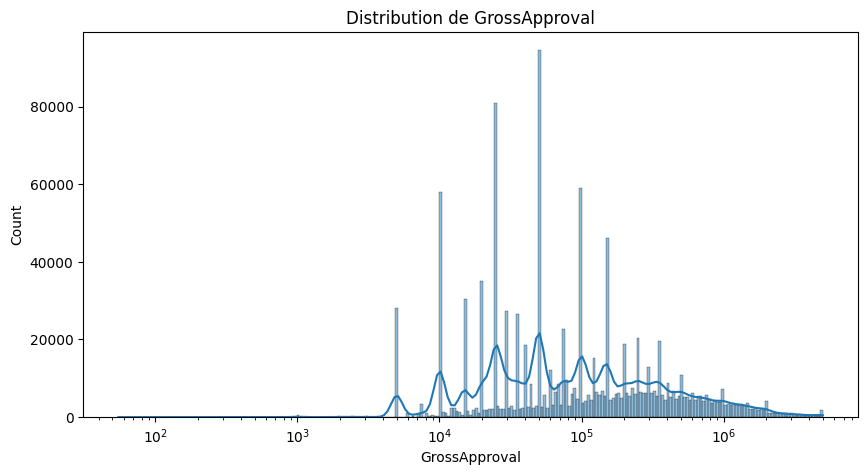

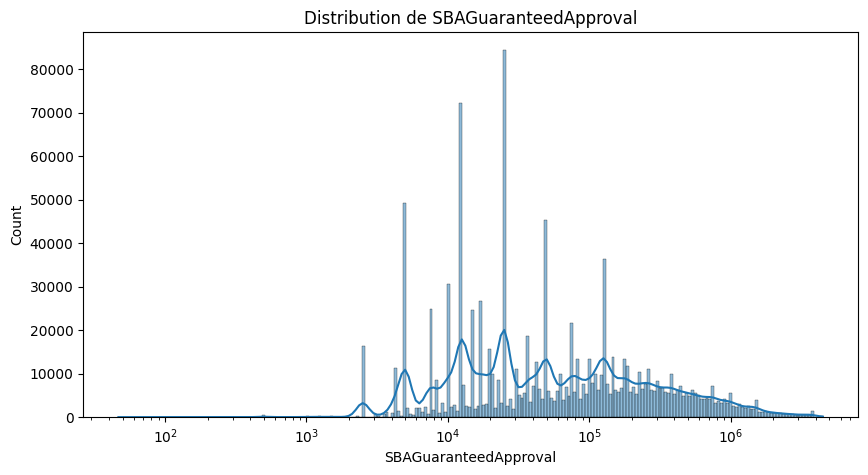

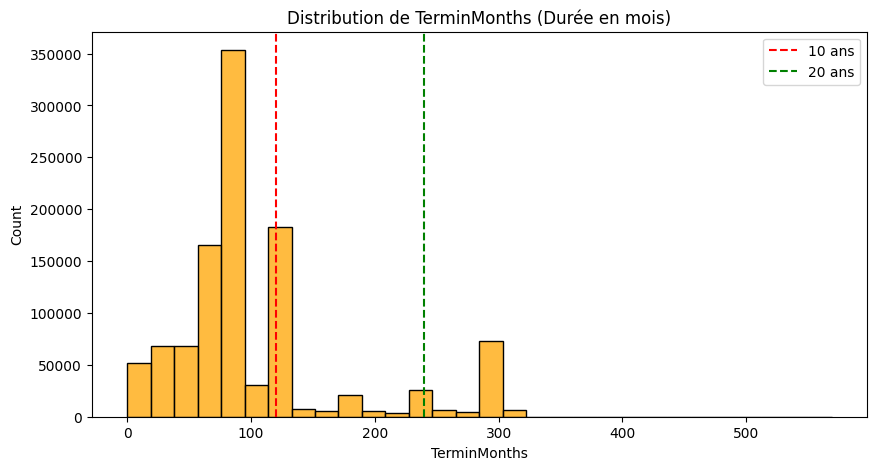

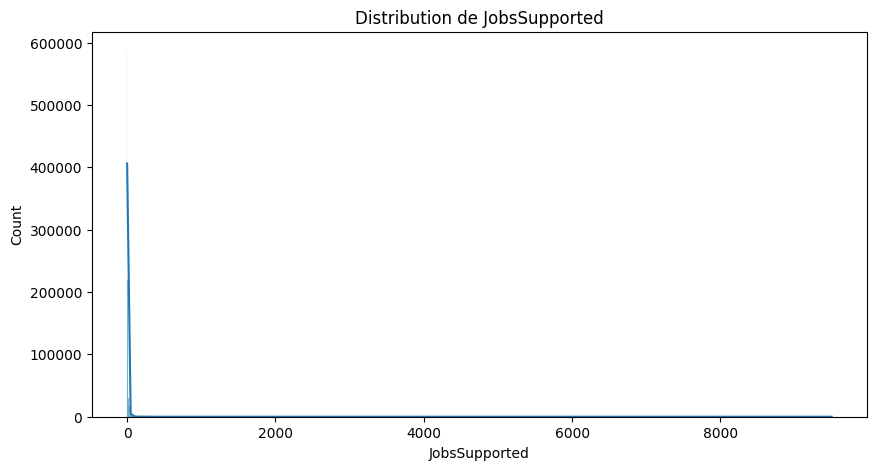

In [33]:
for col in df_num.columns:
    plt.figure(figsize=(10, 5))

    if "Approval" in col:
        sns.histplot(data=df, x=col, kde=True, log_scale=True)
        plt.title(f"Distribution de {col}")
        
    elif "Termin" in col:
        sns.histplot(data=df, x=col, kde=False, bins=30, color='orange')
        plt.title(f"Distribution de {col} (Durée en mois)")
        plt.axvline(x=120, color='r', linestyle='--', label='10 ans') # 120 mois
        plt.axvline(x=240, color='g', linestyle='--', label='20 ans') # 240 mois
        plt.legend()
    else:
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f"Distribution de {col}")

    plt.show()

In [ ]:
# On voit qu'on a globalement affaire à des petites entreprises qui ne créent pas bcp d'emplois
# Les montants prêtés et garanties semblement distirbuées de manière similaire
# On a globalement des prêts à moins de 10ans

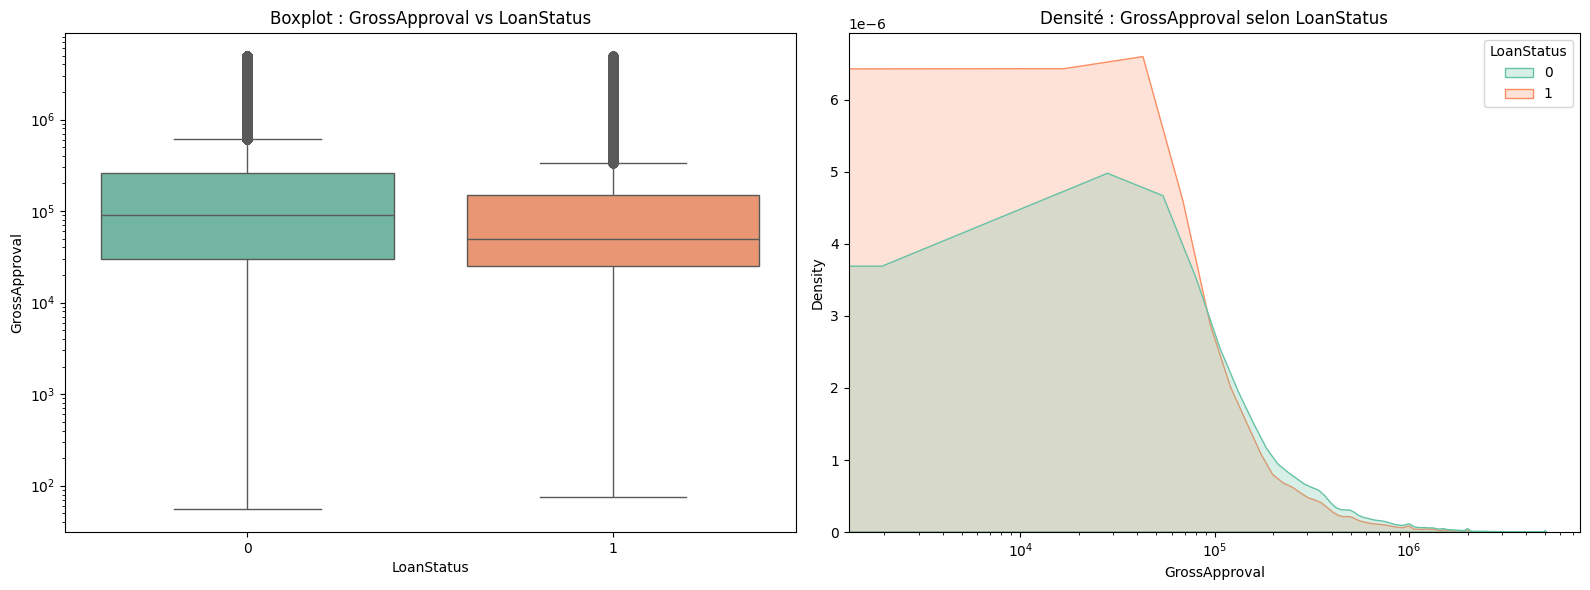

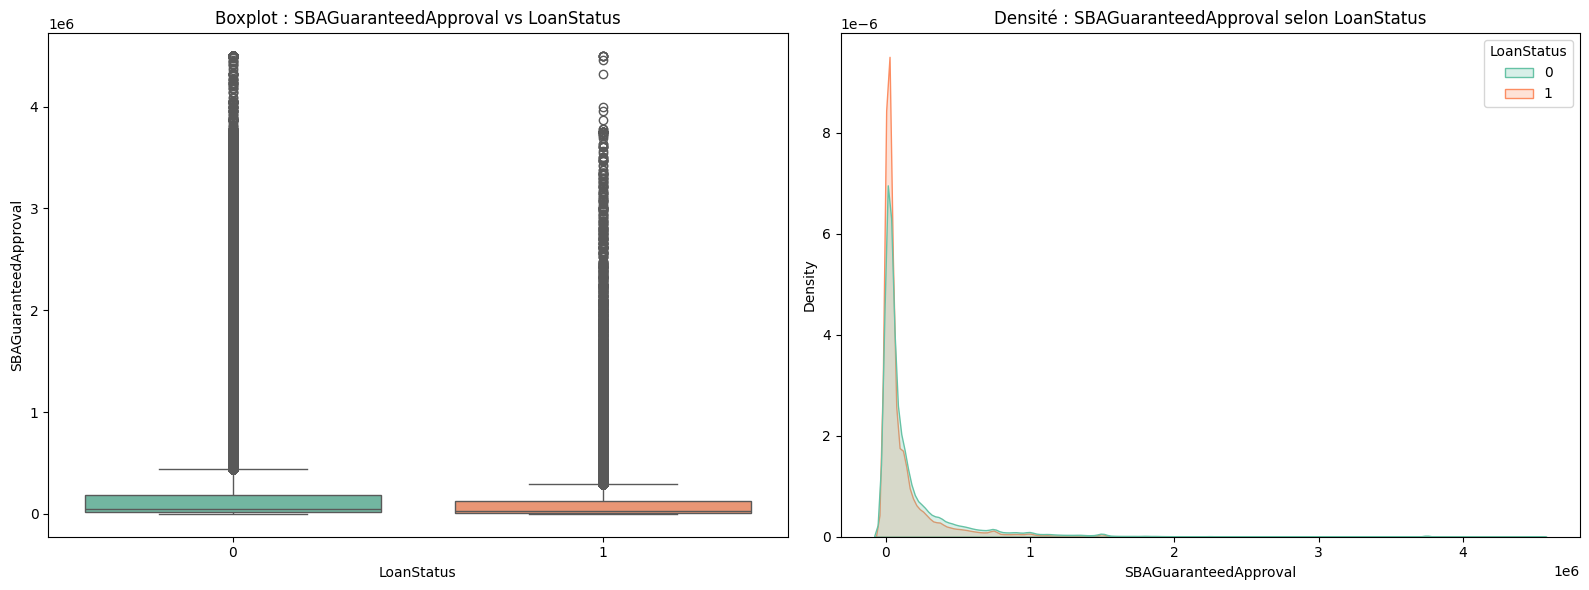

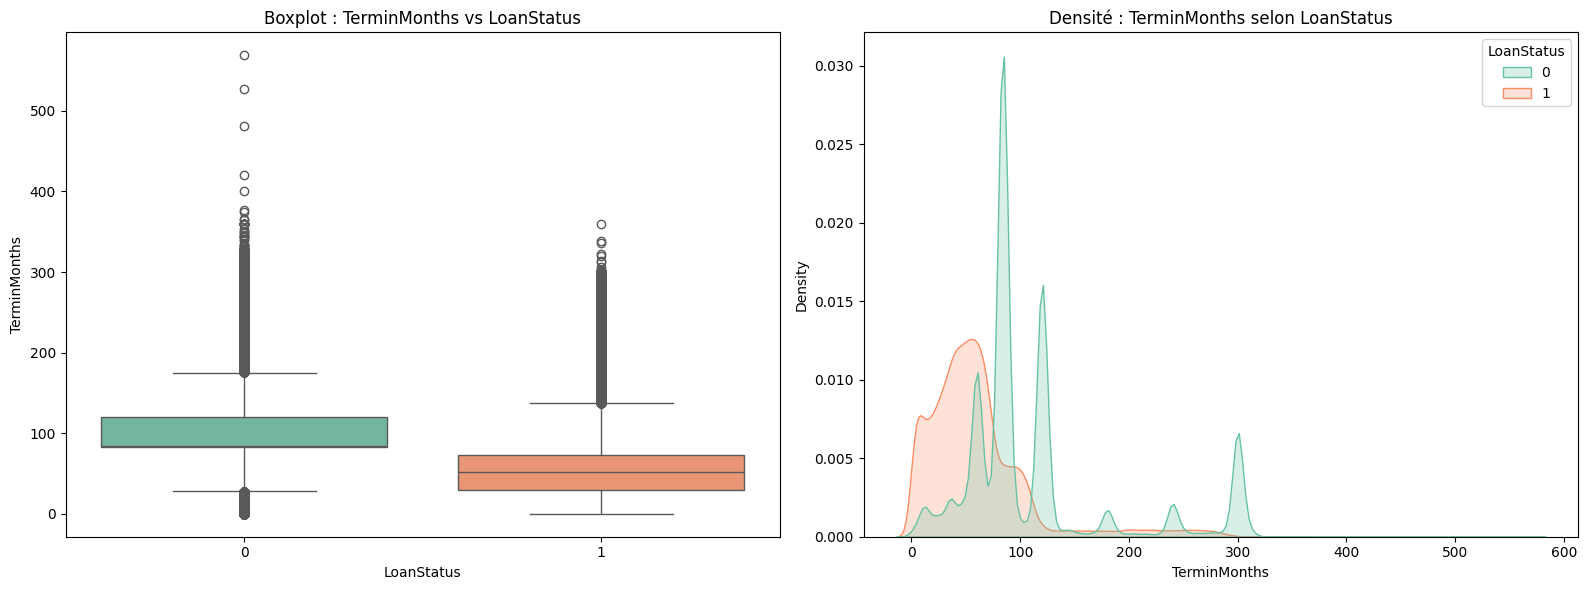

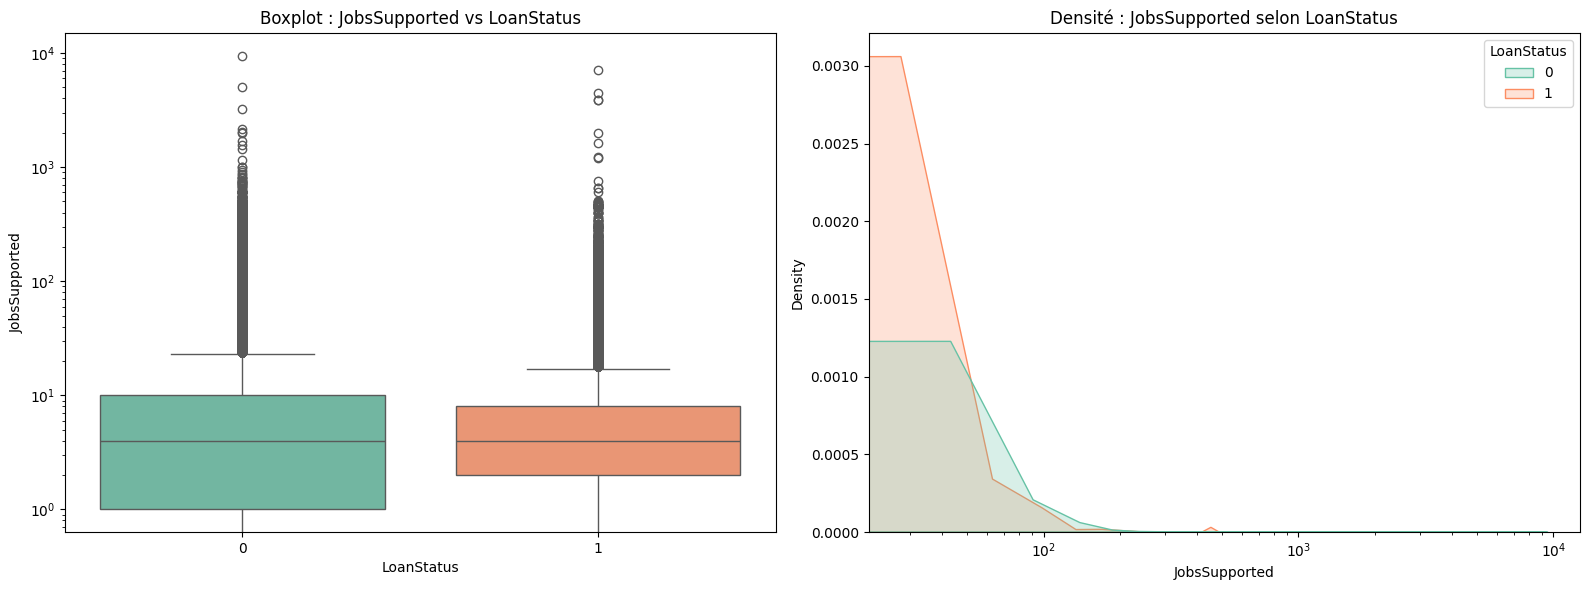

In [37]:
for col in df_num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(
        data=df, 
        x='LoanStatus', 
        y=col, 
        hue='LoanStatus',  
        legend=False,    
        ax=axes[0], 
        palette="Set2"
    )
    axes[0].set_title(f"Boxplot : {col} vs LoanStatus")
    

    if col in ['GrossApproval', 'JobsSupported']:
        axes[0].set_yscale('log')
    
    sns.kdeplot(
        data=df, 
        x=col, 
        hue='LoanStatus', 
        fill=True, 
        common_norm=False, 
        ax=axes[1], 
        palette="Set2"
    )
    axes[1].set_title(f"Densité : {col} selon LoanStatus")
    
    if col in ['GrossApproval', 'JobsSupported']:
        axes[1].set_xscale('log')

    plt.tight_layout()
    plt.show()

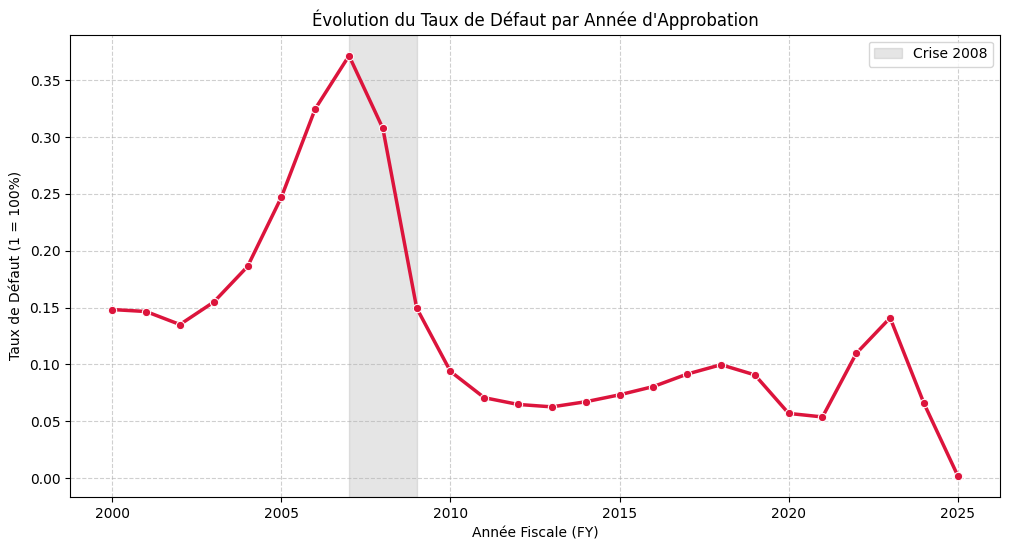

In [40]:
defaut_par_an = df.groupby('ApprovalFY')['LoanStatus'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=defaut_par_an, marker='o', color='crimson', linewidth=2.5)

plt.title("Évolution du Taux de Défaut par Année d'Approbation")
plt.ylabel("Taux de Défaut (1 = 100%)")
plt.xlabel("Année Fiscale (FY)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvspan(2007, 2009, color='gray', alpha=0.2, label='Crise 2008')
plt.legend()
plt.show()

In [47]:
df["BusinessType"] = np.where(df["BusinessType"]== " ", "unknown", df["BusinessType"])
df.BusinessType.value_counts()
# On supprime les lignes ou on n'a pas de business type

BusinessType
CORPORATION    854932
INDIVIDUAL     198304
PARTNERSHIP     25261
                  463
Name: count, dtype: int64

In [54]:
df = df.loc[df["BusinessType"].isin(["CORPORATION", "INDIVIDUAL", "PARTNERSHIP"])]
df.BusinessType.value_counts()

BusinessType
CORPORATION    854932
INDIVIDUAL     198304
PARTNERSHIP     25261
Name: count, dtype: int64

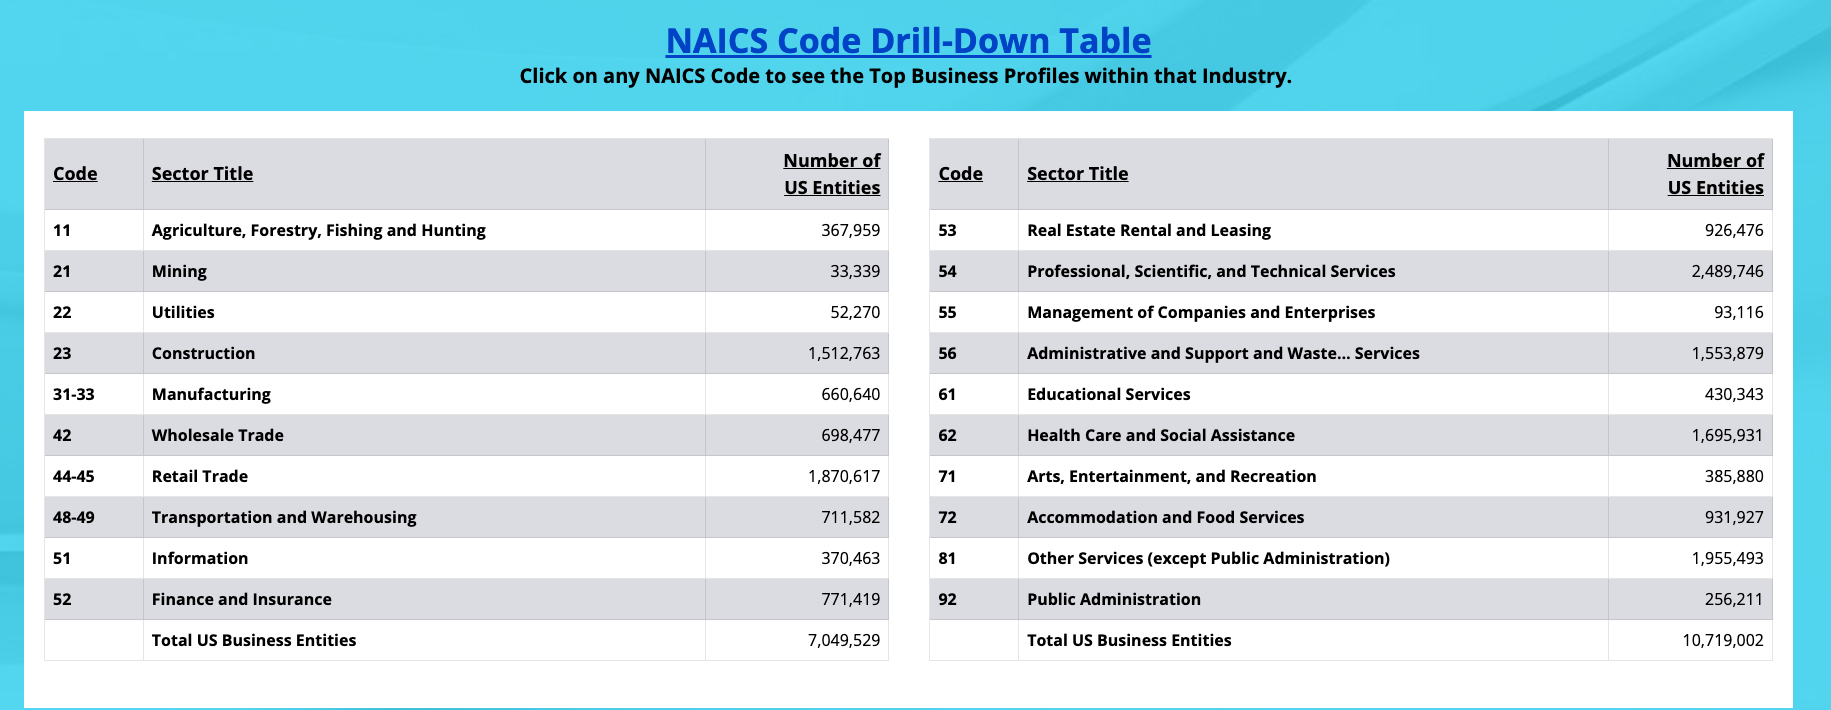

In [69]:
naics_map = {
    '11': 'Agriculture', '21': 'Mining', '22': 'Utilities', '23': 'Construction',
    '31': 'Manufacturing', '32': 'Manufacturing', '33': 'Manufacturing',
    '42': 'Wholesale', '44': 'Retail', '45': 'Retail',
    '48': 'Transport', '49': 'Transport', '51': 'Information',
    '52': 'Finance', '53': 'Real Estate', '54': 'Prof. Services',
    '55': 'Management', '56': 'Admin/Waste', '61': 'Education',
    '62': 'Health Care', '71': 'Arts/Entertainment', '72': 'Accommodation/Food',
    '81': 'Other Services', '92': 'Public Admin', "in": "Inconnu"
}

df['Industry'] = df['NAICSCode'].astype(str).str[:2]

df['IndustryName'] = df['Industry'].map(naics_map).fillna(df['Industry'])

industry_risk = df.groupby('IndustryName')['LoanStatus'].mean().sort_values(ascending=False)

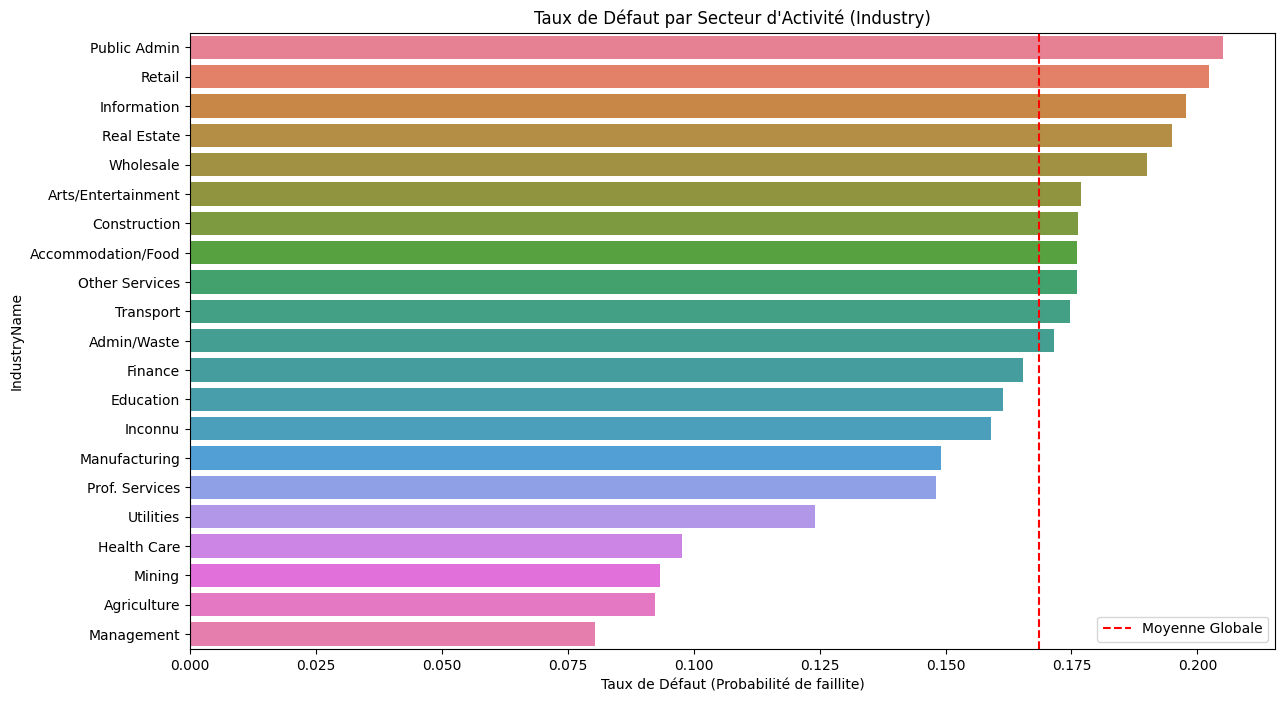

In [71]:
plt.figure(figsize=(14, 8))
sns.barplot(x=industry_risk.values, 
            y=industry_risk.index, 
            hue=industry_risk.index)
plt.title("Taux de Défaut par Secteur d'Activité (Industry)")
plt.xlabel("Taux de Défaut (Probabilité de faillite)")
plt.axvline(x=df['LoanStatus'].mean(), color='r', linestyle='--', label='Moyenne Globale')
plt.legend()
plt.show()

In [66]:
# On voit que le risque dépend très fortement de l'industrie de l'entreprise avec des industries qui semblent performer mieux que d'autres

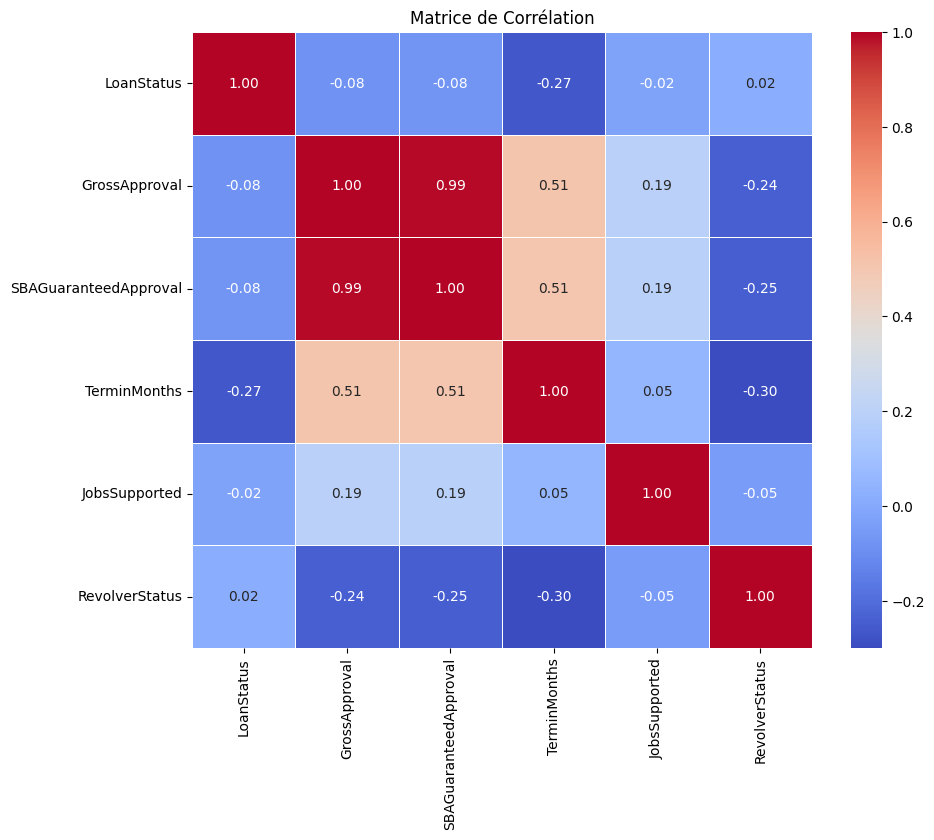

In [67]:
cols_corr = ['LoanStatus', 'GrossApproval', 'SBAGuaranteedApproval', 'TerminMonths', 'JobsSupported', 'RevolverStatus']
corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()